In [79]:
!pip install tensorflow

In [80]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
mnist=tf.keras.datasets.mnist

In [82]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


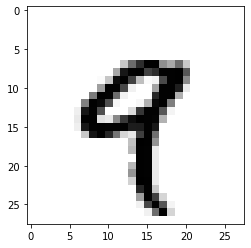

In [84]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

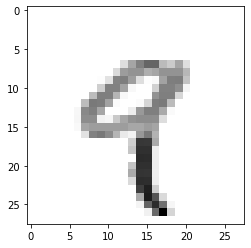

In [85]:
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [86]:
print(x_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [87]:
print(y_train[4])

9


In [88]:
x_trainr=np.array(x_train).reshape(-1,28,28,1)
x_testr=np.array(x_test).reshape(-1,28,28,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [90]:
#### Creating a neural network
m1=Sequential()

#### First layer
m1.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

#### Second Layer
m1.add(Conv2D(64,(3,3)))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

#### Third Layer
m1.add(Conv2D(64,(3,3)))
m1.add(Activation("relu"))#activation function
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(64))
m1.add(Activation("relu"))

m1.add(Dense(32))
m1.add(Activation("relu"))

m1.add(Dense(10))
m1.add(Activation('sigmoid'))


In [91]:
m1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])

In [92]:
h1=m1.fit(x_trainr,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2493 - acc: 0.9204 - val_loss: 0.0997 - val_acc: 0.9710
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0840 - acc: 0.9744 - val_loss: 0.0722 - val_acc: 0.9784
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0608 - acc: 0.9814 - val_loss: 0.0650 - val_acc: 0.9818
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0474 - acc: 0.9851 - val_loss: 0.0530 - val_acc: 0.9845
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0546 - val_acc: 0.9861


In [93]:
r1=pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
0,0.249335,0.920383,0.099675,0.9710,0
1,0.084050,0.974383,0.072243,0.9784,1
2,0.060764,0.981383,0.065019,0.9818,2
3,0.047425,0.985067,0.053001,0.9845,3
4,0.038142,0.987933,0.054581,0.9861,4


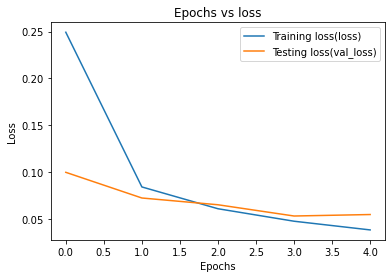

In [94]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss(loss)')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss(val_loss)')
plt.title('Epochs vs loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

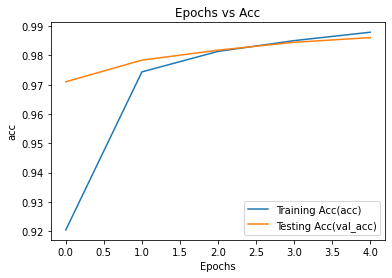

In [95]:
plt.plot(r1['Epochs'],r1['acc'],label='Training Acc(acc)')
plt.plot(r1['Epochs'],r1['val_acc'],label='Testing Acc(val_acc)')
plt.title('Epochs vs Acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [96]:
ypred=m1.predict(x_testr)
print(len(ypred))
print(ypred)

313/313 [==============================] - 2s 6ms/step
10000
[[4.8466169e-04 9.3191797e-01 9.3129146e-01 ... 1.0000000e+00
  6.2225657e-03 4.6842688e-01]
 [1.5640599e-01 9.4866121e-01 9.9999815e-01 ... 8.4563577e-01
  1.5838775e-01 1.2515987e-02]
 [4.2163730e-03 9.9999237e-01 1.2131500e-01 ... 4.4813266e-01
  9.3007930e-02 4.3119673e-02]
 ...
 [3.1922289e-06 1.0200285e-03 1.7596252e-03 ... 1.5166391e-01
  9.8146245e-02 5.7456142e-01]
 [7.7662766e-02 2.5436640e-02 1.5494633e-02 ... 1.7889844e-02
  9.2531872e-01 3.5743040e-01]
 [6.0539488e-02 9.5323272e-02 1.8511289e-01 ... 1.3571438e-04
  9.5228475e-01 4.8225664e-02]]


In [97]:
ypred1=[np.argmax(i) for i in ypred]
ypred1

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 5,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 5,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 8,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [98]:
print(y_test)

[7 2 1 ... 4 5 6]


In [99]:
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
cm=confusion_matrix(y_test,ypred1)
print(cm)


[[ 968    0    0    0    2    0    5    3    0    2]
 [   0 1131    1    0    0    0    1    1    1    0]
 [   1    0 1017    0    2    0    0   11    1    0]
 [   0    0    3  993    0    7    0    2    5    0]
 [   0    0    0    0  975    0    3    1    0    3]
 [   1    1    2    4    0  867    8    2    4    3]
 [   0    3    0    0    5    0  948    0    2    0]
 [   0    2    4    0    3    0    0 1015    2    2]
 [   0    0    3    0    2    0    1    1  966    1]
 [   0    0    0    0   12    4    1    3    8  981]]


In [101]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

